In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
# Load the dataset
data_path = "data_for_predictions.csv"
data = pd.read_csv(data_path)

In [22]:
# Handling missing values
data = data.dropna()

In [24]:
# Identify categorical columns and apply label encoding
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoders for future use

In [26]:
# Selecting features and target
X = data.drop(columns=['churn'])  # Features
y = data['churn']  # Target variable

In [28]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predictions
y_pred = rf_model.predict(X_test)

In [34]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [36]:
# Print evaluation results
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Model Performance:
Accuracy: 0.90
Precision: 0.84
Recall: 0.05
F1 Score: 0.10


In [38]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.84      0.05      0.10       305

    accuracy                           0.90      2922
   macro avg       0.87      0.53      0.52      2922
weighted avg       0.89      0.90      0.86      2922



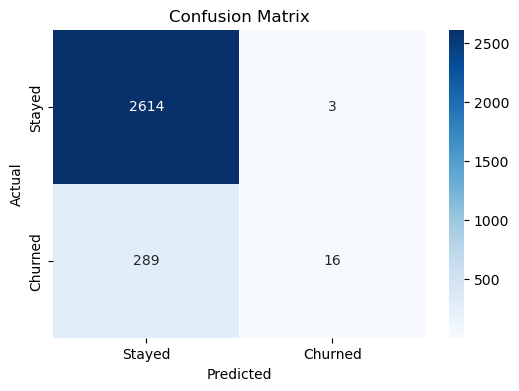

In [40]:
# Confusion Matrix
plt.figure(figsize=(6,4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Explanation of metric choices
print("\nExplanation of Metrics:")
print("- Accuracy: Measures the overall correctness of predictions.")
print("- Precision: Measures how many predicted churns were actually correct (important for minimizing false positives).")
print("- Recall: Measures how many actual churn cases were correctly identified (important for minimizing false negatives).")
print("- F1 Score: Balances precision and recall, especially useful for imbalanced datasets.")


Explanation of Metrics:
- Accuracy: Measures the overall correctness of predictions.
- Precision: Measures how many predicted churns were actually correct (important for minimizing false positives).
- Recall: Measures how many actual churn cases were correctly identified (important for minimizing false negatives).
- F1 Score: Balances precision and recall, especially useful for imbalanced datasets.


In [44]:
# Justification of model performance
total_churn = y_test.sum()
print(f"\nTotal churn cases in test set: {total_churn}")
print("If recall is low, it means we are missing too many churn cases, reducing business value.")
print("If precision is low, we might be falsely predicting churn, leading to unnecessary interventions.")



Total churn cases in test set: 305
If recall is low, it means we are missing too many churn cases, reducing business value.
If precision is low, we might be falsely predicting churn, leading to unnecessary interventions.
